# Analysis of Box Office trends for Microsoft Movie Studio

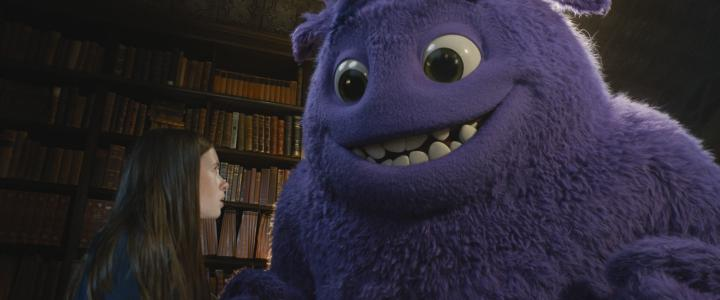
Image from [theNumber](https://www.the-numbers.com/news/256930830-Theater-counts-IF-narrowly-tops-Garfield-to-become-widest-release-on-its-second-weekend-in-theaters)



## Overview
My aim is to gain insights for Microsoft Movie studio by exploring Box office trends.I will do so by analysing genre performance,top grossing films and audience demographics and distribution strategies

### Business Understanding

Microsoft wants to set up a Movie Studio and they lack experience in the film industry.
I have therefore been  tasked with exploring box office data to identify the most strategic films the company can invest in.
I decided to break down the main objective into specific objectives to help me achieve my goal such as:

1.To identify the most strategic movie genres to produce based on the data analysed.

2.To determine the top grossing films that the company can invest in by analysing the production cost to effectively maximise on the profits.

3.To identify our target audience that drive box office success so that Microsoft can tailor content that resonates with the audience.

4.To also determine the distribution strategy to be used in consuming the movies be it theatre or streaming services so that the company can leverage on that.





#### Data Understanding
The data sources for  this analysis will be pulled from 3 separate files.

1.im.db

**Source**-This data set comes from [IMDB](https://www.imdb.com/) a free and open movies data source

**Content**-The data in this set includes relevant tables we will use to analyse our problem such as movie ratings and movie basics.

**Format**-The format for this data set is SQL

2.tmdb.movies.csv 

**Source**This data set comes from [TMDB](https://www.themoviedb.org/).Which is a community built movie and TV database that focusses on international communities that provides the large breadth of dta they have.

**Content**The relevant variables we will use in this set for our analysis includes genre IDs,popularity and vote count which will come in handy.

**Format**-This data is in csv file format


3.tn.movies_budgets.csv

**Source**This data set comes from [TheNumbers](https://www.the-numbers.com/) Which is a website that provides historical box office data for movies.

**Content**The data in the set is categorized by various factors including genre, release date, budget, and domestic/international gross. This data directly addresses our questions about top-grossing films.

**Format**-The format of this data set is a CSV file

#### Importing relevant libraries and Loading data

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
#loading our data
tmdb = pd.read_csv('./data/tmdb.movies.csv')
the_numbers = pd.read_csv('./data/tn.movie_budgets.csv')
conn = sqlite3.connect('./data/im.db')
cur = conn.cursor()

In [5]:
query = """
SELECT * 
   FROM movie_ratings
   JOIN movie_basics AS m
   USING(movie_id)
   ORDER BY m.start_year DESC
;
"""
imdb = pd.read_sql(query, conn)

### Analysing the Data
Three movie websites' worth of data will be analyzed for this project: The Numbers, The movieDB, and IMDB (Internet Movie Database). Here are some datasets to be loaded


1.  IMDB Database

In [6]:
#loading random samples
imdb.sample(10)

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
7744,tt4546326,8.0,8,The Kingsbury Run,The Kingsbury Run,2018,NaN,"Crime,Drama,Thriller"
37193,tt4080378,7.1,8,Enrico Lucherini: Ne ho fatte di tutti i colori,Enrico Lucherini: Ne ho fatte di tutti i colori,2014,70.0,"Biography,Documentary,History"
60102,tt2053359,6.9,83,Fimfarum: The Third Time Lucky 3D,Fimfárum do tretice vseho dobrého 3D,2011,75.0,"Animation,Comedy,Family"
42838,tt2901962,4.7,929,Kummeli V,Kummeli V,2014,102.0,"Adventure,Comedy,Sci-Fi"
26830,tt3859980,5.8,9508,Mohenjo Daro,Mohenjo Daro,2016,155.0,"Action,Adventure,Drama"
70741,tt1641397,7.1,195,Postcard,Ichimai no hagaki,2010,114.0,"Drama,Romance,War"
912,tt5563782,7.6,8,Followed,Followed,2019,NaN,Horror
45035,tt2434620,8.8,18,The Passage of Time,The Passage of Time,2013,69.0,"Biography,Documentary,Family"
18561,tt7102844,5.8,11,Red Sea 4K,Red Sea 4K,2016,50.0,Documentary
22313,tt6814052,4.8,5,The Routes to Roots: Napa and Sonoma,The Routes to Roots: Napa and Sonoma,2016,55.0,Documentary


In [7]:
#know number of rows and columns
imdb.shape

(73856, 8)

In [8]:
#checking imdb information
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [9]:
#checking for null values
imdb.isna().sum()

movie_id              0
averagerating         0
numvotes              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
dtype: int64

In [10]:
#data description
imdb.describe()

,averagerating,numvotes,start_year,runtime_minutes
count,73856.000000,7.385600e+04,73856.000000,66236.000000
mean,6.332729,3.523662e+03,2014.276132,94.654040
std,1.474978,3.029402e+04,2.614807,208.574111
min,1.000000,5.000000e+00,2010.000000,3.000000
25%,5.500000,1.400000e+01,2012.000000,81.000000
50%,6.500000,4.900000e+01,2014.000000,91.000000
75%,7.400000,2.820000e+02,2016.000000,104.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000


In [12]:
#rating data to be used on analysis
ratings = imdb[['original_title', 'genres', 'averagerating']]
ratings.head()

,original_title,genres,averagerating
0,Laiye Je Yaarian,Romance,8.3
1,Borderless,Documentary,8.9
2,Break Clause,"Drama,Thriller",8.0
3,The Little Prince,Action,8.3
4,Chopsticks,"Comedy,Drama",6.5


#### 2.  The MovieDB(tmdb) dataset

In [13]:
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [14]:
# Drop all the duplicates in the dataset
tmdb.drop_duplicates(subset='original_title', inplace=True)
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [15]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24835 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24835 non-null  int64  
 1   genre_ids          24835 non-null  object 
 2   id                 24835 non-null  int64  
 3   original_language  24835 non-null  object 
 4   original_title     24835 non-null  object 
 5   popularity         24835 non-null  float64
 6   release_date       24835 non-null  object 
 7   title              24835 non-null  object 
 8   vote_average       24835 non-null  float64
 9   vote_count         24835 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


In [16]:
tmdb.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [17]:
tmdb.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,24835.000000,24835.000000,24835.000000,24835.000000,24835.000000
mean,12928.276223,292238.828991,3.014810,5.983411,174.200805
std,7644.518907,154908.342389,4.206246,1.866482,896.472992
min,0.000000,27.000000,0.600000,0.000000,1.000000
25%,6303.500000,150749.500000,0.600000,5.000000,1.000000
50%,12748.000000,303623.000000,1.316000,6.000000,5.000000
75%,19494.500000,419152.000000,3.422000,7.000000,25.000000
max,26516.000000,608444.000000,80.773000,10.000000,22186.000000


3.  The Numbers Movie Budgets(tn.movie_budgets) dataset

In [18]:
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [19]:
the_numbers.shape

(5782, 6)

In [21]:
the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [22]:
the_numbers.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

### Cleaning the data

1.  IMDB Database

In [23]:
# Assuming the column containing dollar amounts
def remove_dollar_sign(x):
  return (x.strip('$'))  # Remove dollar sign and convert 

the_numbers['production_budget']\
    = the_numbers['production_budget'].apply(remove_dollar_sign)
the_numbers['domestic_gross']\
    = the_numbers['domestic_gross'].apply(remove_dollar_sign)
the_numbers['worldwide_gross']\
    = the_numbers['worldwide_gross'].apply(remove_dollar_sign)
# Assuming the column containing commas
def remove_commas_to_int(x):
  return int(x.replace(',', ''))  
# Replace comma with empty string and convert to int
the_numbers['production_budget']\
    = the_numbers['production_budget'].apply(remove_commas_to_int)
the_numbers['domestic_gross']\
    = the_numbers['domestic_gross'].apply(remove_commas_to_int)
the_numbers['worldwide_gross']\
    = the_numbers['worldwide_gross'].apply(remove_commas_to_int)

# Show the first few rows
the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [5]:
#EDA
#combining our data
ratings = imdb[['original_title', 'genres', 'averagerating']]
ratings.head()

,original_title,genres,averagerating
0,Laiye Je Yaarian,Romance,8.3
1,Borderless,Documentary,8.9
2,Break Clause,"Drama,Thriller",8.0
3,The Little Prince,Action,8.3
4,Chopsticks,"Comedy,Drama",6.5


In [ ]:
#Finding highest rated genre 


In [ ]:
#top 10 genre